1.
Standard deviation describes how data points are dispersed around the mean and shows how variable the data we are working with is. Meanwhile, Standard error of the mean describes the precision of the sample mean and how much the mean value itself varies across samples. In this way, the SEM tells us how much we can expect the sample mean to vary from the true population mean.

However, Bootstrapping involves repeatedly resampling from the original data and calculating the mean for each sample. This creates a distribution of means that shows how much the sample mean can vary. The standard deviation of this distribution gives us the standard error, which effectively gives us how much the sample mean would vary across different samples from the same population. Thus, SD and SEM become equivalent when using Bootstrapping.

6.
a) What is the process of bootstrapping?
Bootstrapping is a method where you repeatedly take random samples from your original data (with replacement) to create many new datasets. This means after each sample we conduct, we put the selected values back into the original pool where they could be potentially chosen again. We can use bootstrapping to calculate the statistic you're interested in, like the mean, from each of these datasets to see how much it varies.

b) What is the main purpose of bootstrapping?
The main purpose of bootstrapping is to estimate how much a statistic, like the mean, could change if we had different samples. It helps us understand the uncertainty in our estimates without needing to gather more data, which can be expensive and time consuming.

c) If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
You could use bootstrapping to generate a bunch of new means from your sample, then check if your hypothesized guess falls within the range of those bootstrapped means. If your guess is way outside the range of these means, it’s probably not a good estimate.

8.

Problem Introduction
AliTech has developed a vaccine to improve people's health, and we are tasked with determining whether the vaccine has a 
significant positive effect. We will analyze the change in health scores from initial to final (after the vaccine) using 
bootstrapping to estimate the effectiveness of the vaccine.

Null Hypothesis
The Null Hypothesis (H0) for this scenario is that the vaccine has no effect on health. In this case, that means any changes in the health scores are due to natural variation, not the vaccine itself. If the final health score distribution is not significantly different from the initial health score distribution, we will fail to reject this hypothesis.

Data Visualization
To gain an initial insight into the data, we can visualize the change in health scores using a histogram or a line chart. We'll plot both initial and final health scores for a direct comparison.

Quantitative Analysis
Methodology
We will employ the bootstrapping method to assess the variability in health score changes and evaluate whether the observed changes are statistically significant.

a) Calculate Health Improvement: For each patient, the improvement will be calculated as the difference between the final and initial health scores.
Bootstrapping Process:

b) We will randomly sample patients with replacement to generate many bootstrapped datasets.
For each bootstrapped dataset, we'll compute the mean change in health scores.
By repeating this process many times (e.g., 10,000 iterations), we will create a distribution of bootstrapped means.
Assessing the Hypothesis:

c) We will then check if the 95% confidence interval (CI) of these bootstrapped means includes zero. If zero is outside the confidence interval, we will reject the null hypothesis (indicating a statistically significant effect).


Supporting Visualizations
We will visualize the following:

A plot comparing the initial and final health scores.
A histogram of the bootstrapped mean health changes.
The 95% confidence interval of the bootstrapped means.

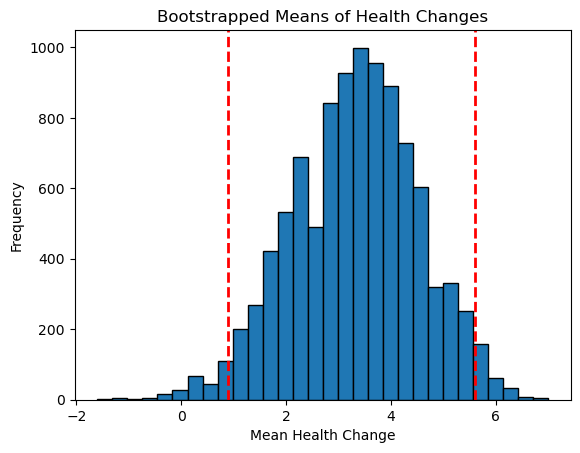

95% Confidence Interval for Health Change: [0.90, 5.60]


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the data and save it as a CSV file
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Save to a CSV file
df.to_csv('health_data.csv', index=False)

# Read the CSV file
df = pd.read_csv('health_data.csv')

# Calculate the health score improvement
df['HealthChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping
np.random.seed(42)
n_iterations = 10000
bootstrap_means = []

for _ in range(n_iterations):
    boot_sample = df.sample(n=len(df), replace=True)
    boot_mean = boot_sample['HealthChange'].mean()
    bootstrap_means.append(boot_mean)

# Calculate the confidence interval
bootstrap_means = np.array(bootstrap_means)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

# Plot the results
plt.hist(bootstrap_means, bins=30, edgecolor='k')
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci_upper, color='red', linestyle='dashed', linewidth=2)
plt.title("Bootstrapped Means of Health Changes")
plt.xlabel("Mean Health Change")
plt.ylabel("Frequency")
plt.show()

# Output the confidence interval
print(f"95% Confidence Interval for Health Change: [{ci_lower:.2f}, {ci_upper:.2f}]")

Findings and Discussion
After running the bootstrapping procedure, we will have a distribution of bootstrapped means, and the 95% confidence interval can be calculated from this distribution. If zero is within this interval, it suggests that the vaccine may not have a significant effect; otherwise, we can reject the null hypothesis.

Conclusion Regarding Null Hypothesis
If the 95% confidence interval does not contain zero, we reject the null hypothesis and conclude that the vaccine likely has a positive effect on health. If zero is within the interval, we fail to reject the null hypothesis, meaning the evidence does not support the claim that the vaccine significantly improves health.

Further Considerations
To improve the robustness of the analysis, we could consider additional factors like age and gender in a multivariate model to see if certain groups benefit more from the vaccine than others.

https://chatgpt.com/share/66ffce33-c444-8007-81e8-24f3b66004e3